In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_voltixSFM_Mars_juillet2023.csv", delimiter='\t', skiprows=[0, 1])

C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\636440484.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_voltixSFM_Mars_juillet2023.csv", delimiter='\t', skiprows=[0, 1])


In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,"id : 254908,"
0,NaN,NaN,"date : ""2023-03-01 00:00:27"","
1,NaN,NaN,"mesure : ""1;869951035170327;241.66,243.09,242...."
2,NaN,"},",NaN
3,NaN,{,NaN
4,NaN,NaN,"id : 254909,"


## EDA

In [4]:
df.drop(['Unnamed: 0','Unnamed: 1'], axis=1, inplace=True)

In [5]:
df.head()

,"id : 254908,"
0,"date : ""2023-03-01 00:00:27"","
1,"mesure : ""1;869951035170327;241.66,243.09,242...."
2,NaN
3,NaN
4,"id : 254909,"


In [6]:
df = df.dropna()

In [7]:
df2 = {"id : 254908,": "value" }  # Replace value1 and value2 with the values you want to add.

# Convert the dictionary df2 into a DataFrame
df2_row = pd.DataFrame([df2])

# Concatenate df2_row with the original DataFrame df
df = pd.concat([df2_row, df], ignore_index=True)

In [8]:
# Get the value from the first row (index 0) as the column name
column_name = df.iloc[0, 0]

# Rename the column with the extracted column name
df.columns = [column_name]

# Drop the first row from the DataFrame to exclude it from the data
df = df.iloc[1:].reset_index(drop=True)

In [9]:
df2 = {"value": "id : 254908," }  # Replace value1 and value2 with the values you want to add.

# Convert the dictionary df2 into a DataFrame
df2_row = pd.DataFrame([df2])

# Concatenate df2_row with the original DataFrame df
df = pd.concat([df2_row, df], ignore_index=True)

In [10]:
df.head()

,value
0,"id : 254908,"
1,"date : ""2023-03-01 00:00:27"","
2,"mesure : ""1;869951035170327;241.66,243.09,242...."
3,"id : 254909,"
4,"date : ""2023-03-01 00:00:50"","


In [11]:
df.tail()

,value
4802989,"date : ""2023-07-25 16:13:08"","
4802990,"mesure : ""1;869951035170327;241.68,240.95,241...."
4802991,"id : 1857105,"
4802992,"date : ""2023-07-25 16:13:09"","
4802993,"mesure : ""1;869951034492375;241.19,240.08,239...."


In [12]:
df.shape

(4802994, 1)

In [13]:
# Combine consecutive three rows into a single row
combined_rows_list = [pd.concat([df.iloc[i], df.iloc[i + 1], df.iloc[i + 2]], ignore_index=True)
                      for i in range(0, len(df), 3)]

# Create a new DataFrame with the combined rows
combined_df = pd.DataFrame(combined_rows_list)

In [14]:
# Drop the original index and reset it
combined_df.reset_index(drop=True, inplace=True)

In [15]:
combined_df.head()

,0,1,2
0,"id : 254908,","date : ""2023-03-01 00:00:27"",","mesure : ""1;869951035170327;241.66,243.09,242...."
1,"id : 254909,","date : ""2023-03-01 00:00:50"",","mesure : ""1;869951035170327;118.96,92.48,125.1..."
2,"id : 254910,","date : ""2023-03-01 00:01:24"",","mesure : ""1;869951035170327;241.75,243.17,242...."
3,"id : 254911,","date : ""2023-03-01 00:01:58"",","mesure : ""1;869951035170327;241.37,242.78,242...."
4,"id : 254912,","date : ""2023-03-01 00:02:31"",","mesure : ""1;869951035170327;241.35,242.77,242...."


In [16]:
combined_df.tail()

,0,1,2
1600993,"id : 1857101,","date : ""2023-07-25 16:12:54"",","mesure : ""1;869951034492375;241.35,240.71,239...."
1600994,"id : 1857102,","date : ""2023-07-25 16:13:01"",","mesure : ""1;869951035026099;241.12,241.12,241...."
1600995,"id : 1857103,","date : ""2023-07-25 16:13:05"",","mesure : ""1;869951032564233;239.13,242.23,239...."
1600996,"id : 1857104,","date : ""2023-07-25 16:13:08"",","mesure : ""1;869951035170327;241.68,240.95,241...."
1600997,"id : 1857105,","date : ""2023-07-25 16:13:09"",","mesure : ""1;869951034492375;241.19,240.08,239...."


In [17]:
# Use regular expressions to remove "date :" and "mesure :" prefixes from specific columns
combined_df[0] = combined_df[0].replace(r'\bid\s*:\s*', '', regex=True)
combined_df[1] = combined_df[1].replace(r'\bdate\s*:\s*', '', regex=True)
combined_df[2] = combined_df[2].replace(r'\bmesure\s*:\s*', '', regex=True)

In [18]:
combined_df.iloc[:, 0] = combined_df.iloc[:, 0].str.replace(',', '')
combined_df.iloc[:, 1] = combined_df.iloc[:, 1].str.replace(',', '')

In [19]:
combined_df.iloc[:, 1] = combined_df.iloc[:, 1].str.replace('"', '')
combined_df.iloc[:, 2] = combined_df.iloc[:, 2].str.replace('"', '')

In [20]:
combined_df.rename(columns={0: "ID", 1: "Date", 2: "Mesure"}, inplace=True)

In [21]:
combined_df.head()

,ID,Date,Mesure
0,254908,2023-03-01 00:00:27,"1;869951035170327;241.66,243.09,242.83,419.12,..."
1,254909,2023-03-01 00:00:50,"1;869951035170327;118.96,92.48,125.14,0.00,0.0..."
2,254910,2023-03-01 00:01:24,"1;869951035170327;241.75,243.17,242.90,419.25,..."
3,254911,2023-03-01 00:01:58,"1;869951035170327;241.37,242.78,242.44,418.54,..."
4,254912,2023-03-01 00:02:31,"1;869951035170327;241.35,242.77,242.41,418.56,..."


In [22]:
combined_df.shape

(1600998, 3)

In [184]:
combined_df['Mesure'].unique()

array(['1;869951035170327;241.66,243.09,242.83,419.12,421.02,420.04,1,1,1;0.00,0.00,0.39,0.00,0.00,0.05,1,1,2;0.05,-0.04,0.11,0.47,50.05,0,1,1,5;GSM,-31_dB,1256720837,3.84,0,1.1.10,1,1,10;',
       '1;869951035170327;118.96,92.48,125.14,0.00,0.00,0.00,1,1,6;32.14,7.96,2.38,0.84,0.98,28.08,1,1,7;336.62,0.00,33.28,20.98,0,0,1,1,8;GSM,-31_dB,4189920614,3.84,0,1.1.10,1,1,10;',
       '1;869951035170327;241.75,243.17,242.90,419.25,420.94,420.23,1,1,1;0.00,0.00,0.40,0.00,0.00,0.05,1,1,2;0.05,-0.04,0.11,0.48,50.03,0,1,1,5;GSM,-31_dB,1869650278,3.80,0,1.1.10,1,1,10;',
       ...,
       '1;869951032564233;239.13,242.23,239.35,415.36,417.06,415.67,1,4,1;4.32,3.37,2.39,0.94,0.61,0.46,1,4,2;-0.29,0.52,0.27,1.03,0.82,0.57,1,4,3;0.91,0.75,0.91,0,0,0,1,4,4;2.02,0.50,2.42,0.83,50.24,0,1,4,5;GSM,-9_dB,3494241290,3.94,0,1.1.11,1,1,10;',
       '1;869951035170327;241.68,240.95,241.08,416.90,417.45,419.00,1,1,1;0.00,0.00,0.46,0.00,0.00,0.09,1,1,2;-0.00,-0.00,0.05,0.01,0.01,0.11,1,1,3;0.00,0.00,0.00,0,0,0

In [139]:
print(combined_df['Mesure'].str.count(';') + 1)

0          7
1          7
2          7
3          7
4          7
          ..
1600993    9
1600994    9
1600995    9
1600996    9
1600997    9
Name: Mesure, Length: 1600998, dtype: int64


## Splitting the Columns of the DataFrame

In [23]:
# Splitting Mesure Column
combined_df[['Meter_ID', 'IMEI', 'Voltage', 'Current/Active_Power', 'Power_per_phase', 'Power_factor','Total_Power','Config','Column9']] = combined_df['Mesure'].str.split(';', expand=True) 

In [24]:
combined_df.drop('Mesure', axis=1, inplace=True)

In [25]:
# Splitting Current/Active Power Column
combined_df[['Phase_1_current', 'Phase_2_current', 'Phase_3_current', 'Phase_1_active_power', 'Phase_2_active_power', 'Phase_3_active_power','Meter_ID_2','Channel_ID_2','InfoType_2']] = combined_df['Current/Active_Power'].str.split(',', expand=True)

In [ ]:
# Splitting Voltage Column
combined_df[['Phase_1_to_line_voltage', 'Phase_2_to_line_voltage', 'Phase_3_to_line_voltage', 'Phase_1_to_Phase_2_voltage', 'Phase_2_to_Phase_3_voltage', 'Phase_3_to_Phase_1_voltage','Meter_ID_1','Channel_ID_1','InfoType_1']] = combined_df['Voltage'].str.split(',', expand=True)

In [ ]:
# Splitting Total Power Column
combined_df[['Total_active_power', 'Total_reactive_power', 'Total_apparent_power', 'Total_power_factor', 'Frequency', 'NA','Meter_ID_3','Channel_ID_3','InfoType_3']] = combined_df['Total_Power'].str.split(',', expand=True)

In [ ]:
# Splitting Config Column
combined_df[['Connection_Mode', 'RSSI', 'IP_Adress', 'NA', 'NA', 'Version','Meter_ID_4','Channel_ID_4','InfoType_4']] = combined_df['Config'].str.split(',', expand=True)

In [26]:
from IPython.display import display
pd.options.display.max_columns = None

In [27]:
combined_df.head()

,ID,Date,Meter_ID,IMEI,Voltage,Current/Active_Power,Power_per_phase,Power_factor,Total_Power,Config,Column9,Phase_1_current,Phase_2_current,Phase_3_current,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power,Meter_ID_2,Channel_ID_2,InfoType_2
0,254908,2023-03-01 00:00:27,1,869951035170327,"241.66,243.09,242.83,419.12,421.02,420.04,1,1,1","0.00,0.00,0.39,0.00,0.00,0.05,1,1,2","0.05,-0.04,0.11,0.47,50.05,0,1,1,5","GSM,-31_dB,1256720837,3.84,0,1.1.10,1,1,10",,None,None,0.00,0.00,0.39,0.00,0.00,0.05,1,1,2
1,254909,2023-03-01 00:00:50,1,869951035170327,"118.96,92.48,125.14,0.00,0.00,0.00,1,1,6","32.14,7.96,2.38,0.84,0.98,28.08,1,1,7","336.62,0.00,33.28,20.98,0,0,1,1,8","GSM,-31_dB,4189920614,3.84,0,1.1.10,1,1,10",,None,None,32.14,7.96,2.38,0.84,0.98,28.08,1,1,7
2,254910,2023-03-01 00:01:24,1,869951035170327,"241.75,243.17,242.90,419.25,420.94,420.23,1,1,1","0.00,0.00,0.40,0.00,0.00,0.05,1,1,2","0.05,-0.04,0.11,0.48,50.03,0,1,1,5","GSM,-31_dB,1869650278,3.80,0,1.1.10,1,1,10",,None,None,0.00,0.00,0.40,0.00,0.00,0.05,1,1,2
3,254911,2023-03-01 00:01:58,1,869951035170327,"241.37,242.78,242.44,418.54,420.21,419.62,1,1,1","0.00,0.00,0.39,0.00,0.00,0.05,1,1,2","0.05,-0.04,0.11,0.47,50.00,0,1,1,5","GSM,-31_dB,3177384389,3.84,0,1.1.10,1,1,10",,None,None,0.00,0.00,0.39,0.00,0.00,0.05,1,1,2
4,254912,2023-03-01 00:02:31,1,869951035170327,"241.35,242.77,242.41,418.56,420.17,419.54,1,1,1","0.00,0.00,0.38,0.00,0.00,0.05,1,1,2","0.05,-0.04,0.11,0.47,49.91,0,1,1,5","GSM,-31_dB,666999398,3.82,0,1.1.10,1,1,10",,None,None,0.00,0.00,0.38,0.00,0.00,0.05,1,1,2


In [28]:
combined_df.tail()

,ID,Date,Meter_ID,IMEI,Voltage,Current/Active_Power,Power_per_phase,Power_factor,Total_Power,Config,Column9,Phase_1_current,Phase_2_current,Phase_3_current,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power,Meter_ID_2,Channel_ID_2,InfoType_2
1600993,1857101,2023-07-25 16:12:54,1,869951034492375,"241.35,240.71,239.80,417.94,416.13,416.28,1,1,1","0.58,0.18,0.26,0.08,0.02,0.03,1,1,2","-0.10,-0.01,-0.05,0.14,0.04,0.06,1,1,3","0.60,0.57,0.60,0,0,0,1,1,4","0.13,-0.17,0.24,0.55,50.01,0,1,1,5","Wifi,-52_dB,2080417984,0,0,1.1.11,1,1,10",,0.58,0.18,0.26,0.08,0.02,0.03,1,1,2
1600994,1857102,2023-07-25 16:13:01,1,869951035026099,"241.12,241.12,241.80,417.63,419.05,417.28,1,1,1","0.00,0.00,0.13,0.00,0.01,0.03,1,1,2","0.00,0.00,-0.00,0.00,0.01,0.03,1,1,3","0.00,0.00,0.00,0,0,0,1,1,4","0.04,0.00,0.05,0.74,50.06,0,1,1,5","GSM,-16_dB,1236737382,3.88,0,1.1.11,1,1,10",,0.00,0.00,0.13,0.00,0.01,0.03,1,1,2
1600995,1857103,2023-07-25 16:13:05,1,869951032564233,"239.13,242.23,239.35,415.36,417.06,415.67,1,4,1","4.32,3.37,2.39,0.94,0.61,0.46,1,4,2","-0.29,0.52,0.27,1.03,0.82,0.57,1,4,3","0.91,0.75,0.91,0,0,0,1,4,4","2.02,0.50,2.42,0.83,50.24,0,1,4,5","GSM,-9_dB,3494241290,3.94,0,1.1.11,1,1,10",,4.32,3.37,2.39,0.94,0.61,0.46,1,4,2
1600996,1857104,2023-07-25 16:13:08,1,869951035170327,"241.68,240.95,241.08,416.90,417.45,419.00,1,1,1","0.00,0.00,0.46,0.00,0.00,0.09,1,1,2","-0.00,-0.00,0.05,0.01,0.01,0.11,1,1,3","0.00,0.00,0.00,0,0,0,1,1,4","0.09,0.04,0.12,0.74,50.06,0,1,1,5","GSM,-27_dB,2416969413,3.88,0,1.1.11,1,1,10",,0.00,0.00,0.46,0.00,0.00,0.09,1,1,2
1600997,1857105,2023-07-25 16:13:09,1,869951034492375,"241.19,240.08,239.46,417.47,415.03,415.81,1,1,1","0.58,0.18,0.26,0.08,0.02,0.03,1,1,2","-0.10,-0.01,-0.05,0.14,0.04,0.06,1,1,3","0.60,0.57,0.60,0,0,0,1,1,4","0.13,-0.16,0.24,0.56,50.01,0,1,1,5","Wifi,-52_dB,2080417984,0,0,1.1.11,1,1,10",,0.58,0.18,0.26,0.08,0.02,0.03,1,1,2


In [29]:
Final_df = combined_df[['ID', 'Date', 'Current/Active_Power', 'Meter_ID', 'Phase_1_current','Phase_2_current','Phase_3_current',
                       'Phase_1_active_power','Phase_2_active_power','Phase_3_active_power','Meter_ID_2','Channel_ID_2','InfoType_2']]

In [30]:
Final_df.drop(['ID','Meter_ID','Meter_ID_2','Channel_ID_2','InfoType_2','Current/Active_Power'], axis=1, inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\170008538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df.drop(['ID','Meter_ID','Meter_ID_2','Channel_ID_2','InfoType_2','Current/Active_Power'], axis=1, inplace=True)


In [31]:
Final_df.head()

,Date,Phase_1_current,Phase_2_current,Phase_3_current,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power
0,2023-03-01 00:00:27,0.00,0.00,0.39,0.00,0.00,0.05
1,2023-03-01 00:00:50,32.14,7.96,2.38,0.84,0.98,28.08
2,2023-03-01 00:01:24,0.00,0.00,0.40,0.00,0.00,0.05
3,2023-03-01 00:01:58,0.00,0.00,0.39,0.00,0.00,0.05
4,2023-03-01 00:02:31,0.00,0.00,0.38,0.00,0.00,0.05


In [32]:
Final_df.tail()

,Date,Phase_1_current,Phase_2_current,Phase_3_current,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power
1600993,2023-07-25 16:12:54,0.58,0.18,0.26,0.08,0.02,0.03
1600994,2023-07-25 16:13:01,0.00,0.00,0.13,0.00,0.01,0.03
1600995,2023-07-25 16:13:05,4.32,3.37,2.39,0.94,0.61,0.46
1600996,2023-07-25 16:13:08,0.00,0.00,0.46,0.00,0.00,0.09
1600997,2023-07-25 16:13:09,0.58,0.18,0.26,0.08,0.02,0.03


In [33]:
Final_df.shape

(1600998, 7)

## Converting DataTypes

In [40]:
Final_df.dtypes

Date                    object
Phase_1_current         object
Phase_2_current         object
Phase_3_current         object
Phase_1_active_power    object
Phase_2_active_power    object
Phase_3_active_power    object
dtype: object

In [34]:
Final_df['Date'] = pd.to_datetime(Final_df['Date'], utc=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\968713028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Date'] = pd.to_datetime(Final_df['Date'], utc=True)


In [35]:
Final_df['Phase_1_current'] = pd.to_numeric(Final_df['Phase_1_current'], errors='coerce').astype(float)
Final_df['Phase_2_current'] = pd.to_numeric(Final_df['Phase_1_current'], errors='coerce').astype(float)
Final_df['Phase_3_current'] = pd.to_numeric(Final_df['Phase_1_current'], errors='coerce').astype(float)
Final_df['Phase_1_active_power'] = pd.to_numeric(Final_df['Phase_1_active_power'], errors='coerce').astype(float)
Final_df['Phase_2_active_power'] = pd.to_numeric(Final_df['Phase_1_active_power'], errors='coerce').astype(float)
Final_df['Phase_3_active_power'] = pd.to_numeric(Final_df['Phase_1_active_power'], errors='coerce').astype(float)

C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\4260092540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Phase_1_current'] = pd.to_numeric(Final_df['Phase_1_current'], errors='coerce').astype(float)
C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\4260092540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_df['Phase_2_current'] = pd.to_numeric(Final_df['Phase_1_current'], errors='coerce').astype(float)
C:\Users\MSI\AppData\Local\Temp\ipykernel_11884\4260092540.py:3: SettingWithCopyWa

In [44]:
Final_df.dtypes

Date                    datetime64[ns, UTC]
Phase_1_current                     float64
Phase_2_current                     float64
Phase_3_current                     float64
Phase_1_active_power                float64
Phase_2_active_power                float64
Phase_3_active_power                float64
dtype: object

## Checking NaN values

In [37]:
Final_df['Phase_1_active_power'].isna().sum()

30

In [38]:
Final_df.isna().sum()

Date                        0
Phase_1_current         29204
Phase_2_current         29204
Phase_3_current         29204
Phase_1_active_power       30
Phase_2_active_power       30
Phase_3_active_power       30
dtype: int64

In [39]:
Final_df.isna().any()

Date                    False
Phase_1_current          True
Phase_2_current          True
Phase_3_current          True
Phase_1_active_power     True
Phase_2_active_power     True
Phase_3_active_power     True
dtype: bool

In [40]:
Final_df.shape

(1600998, 7)

In [36]:
Active_Power_df = Final_df.drop(['Phase_1_current','Phase_2_current','Phase_3_current'], axis=1)

In [37]:
Active_Power_df.head()

,Date,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power
0,2023-03-01 00:00:27+00:00,0.00,0.00,0.00
1,2023-03-01 00:00:50+00:00,0.84,0.84,0.84
2,2023-03-01 00:01:24+00:00,0.00,0.00,0.00
3,2023-03-01 00:01:58+00:00,0.00,0.00,0.00
4,2023-03-01 00:02:31+00:00,0.00,0.00,0.00


In [38]:
Active_Power_df.shape

(1600998, 4)

In [39]:
Active_Power_df.dropna(inplace=True)

In [40]:
Active_Power_df.isna().any()

Date                    False
Phase_1_active_power    False
Phase_2_active_power    False
Phase_3_active_power    False
dtype: bool

# Appliances classification

====== Etage_2 =======

devices_1 = {"Eclairage_1(hassen)": 120 w, "Eclairage_Toilette_H": 17 w, "Eclairage_Toilette_F": 10 w, "Eclairage_2(Erij)": 34 w}

devices_2 = {"Climatiseur_SalleServer": 772 w, "Refrigerateur": 70 w, "SalleServer": 325w}

devices_3 = {"Climatiseur_Green": 1300 w, "Climatiseur_LG": 850 w, "Video-Pojecteur": 250 w}

In [41]:
from sklearn.cluster import KMeans

In [43]:
X = Active_Power_df.drop("Date", axis=1)

In [44]:
# StanderScaler X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

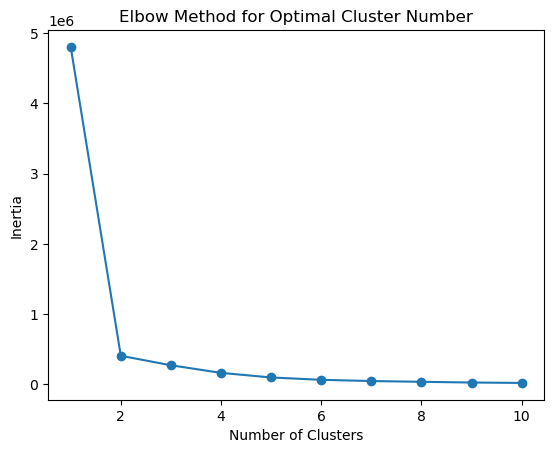

In [59]:
inertia_values = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to identify the "elbow" point
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

In [60]:
# Create and fit the KMeans model
kmeans = KMeans(n_clusters=6, init= 'random', random_state=0)
kmeans.fit(X_scaled)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=6, random_state=0)

In [61]:
kmeans.cluster_centers_

array([[-4.27475009e-02, -4.27475009e-02, -4.27475009e-02],
       [ 5.76010683e-03,  5.76010683e-03,  5.76010683e-03],
       [ 1.43694280e+02,  1.43694280e+02,  1.43694280e+02],
       [ 1.13074056e+02,  1.13074056e+02,  1.13074056e+02],
       [ 8.58493755e+01,  8.58493755e+01,  8.58493755e+01],
       [ 9.36183280e-01,  9.36183280e-01,  9.36183280e-01]])

In [62]:
kmeans.n_iter_

16

In [63]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 158897.0949561556


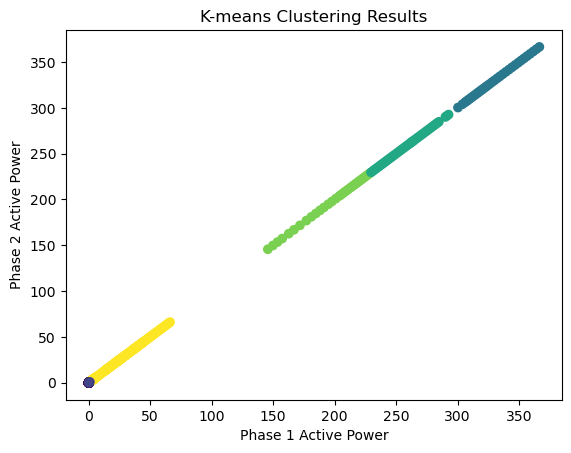

In [64]:
import matplotlib.pyplot as plt

# Add cluster labels to the DataFrame
Active_Power_df["Cluster"] = kmeans.labels_

plt.scatter(Active_Power_df["Phase_1_active_power"], Active_Power_df["Phase_2_active_power"], c=Active_Power_df["Cluster"])
plt.xlabel("Phase 1 Active Power")
plt.ylabel("Phase 2 Active Power")
plt.title("K-means Clustering Results")
plt.show()


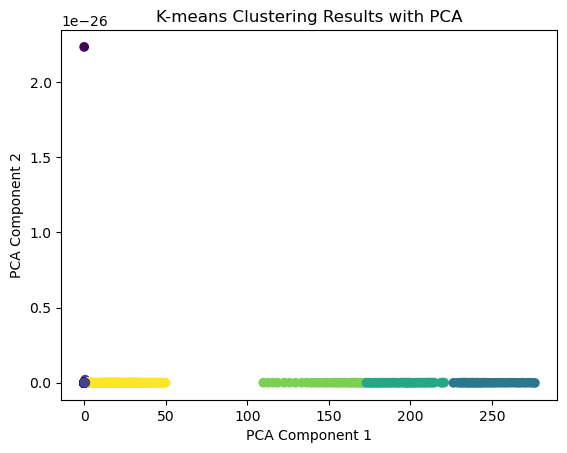

In [65]:
from sklearn.decomposition import PCA

# Assuming you have X_scaled
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Assuming you have kmeans.labels_ from your KMeans model
Active_Power_df["Cluster"] = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Active_Power_df["Cluster"])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-means Clustering Results with PCA")
plt.show()


In [66]:
Active_Power_df.head()

,Date,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power,Cluster
0,2023-03-01 00:00:27+00:00,0.00,0.00,0.00,0
1,2023-03-01 00:00:50+00:00,0.84,0.84,0.84,1
2,2023-03-01 00:01:24+00:00,0.00,0.00,0.00,0
3,2023-03-01 00:01:58+00:00,0.00,0.00,0.00,0
4,2023-03-01 00:02:31+00:00,0.00,0.00,0.00,0


## Kmeans for Phase_1_active_power

In [70]:
column_data = Active_Power_df['Phase_1_active_power'].values.reshape(-1, 1)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(column_data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [71]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 716468.1191979189


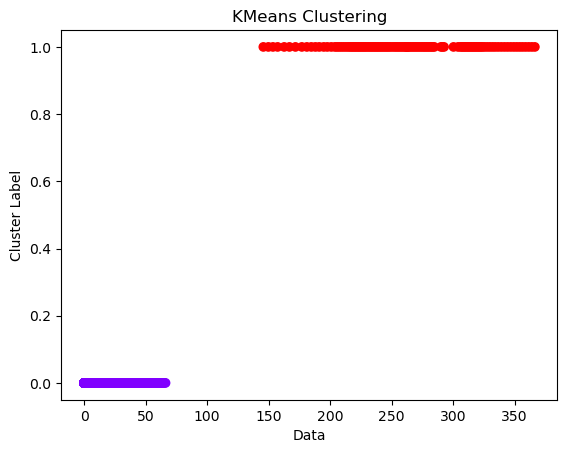

In [72]:
import matplotlib.pyplot as plt

plt.scatter(column_data, kmeans.labels_, c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Data')
plt.ylabel('Cluster Label')
plt.title('KMeans Clustering')
plt.show()


## Kmeans for Phase_2_active_power

In [79]:
column_data = Active_Power_df['Phase_2_active_power'].values.reshape(-1, 1)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(column_data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [80]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 478683.0196822573


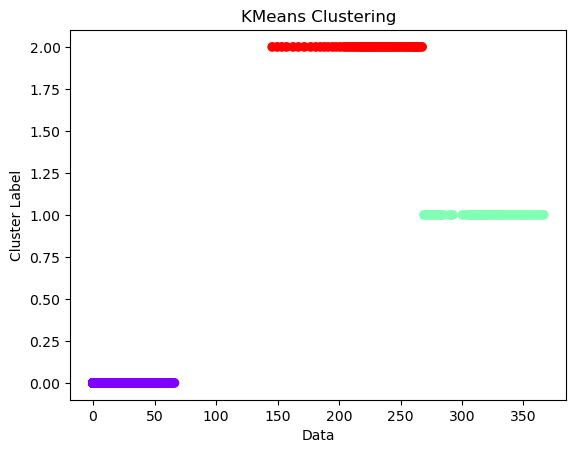

In [81]:
import matplotlib.pyplot as plt

plt.scatter(column_data, kmeans.labels_, c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Data')
plt.ylabel('Cluster Label')
plt.title('KMeans Clustering')
plt.show()


## Kmeans for Phase_3_active_power

In [82]:
column_data = Active_Power_df['Phase_3_active_power'].values.reshape(-1, 1)

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(column_data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [83]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 478683.0196822573


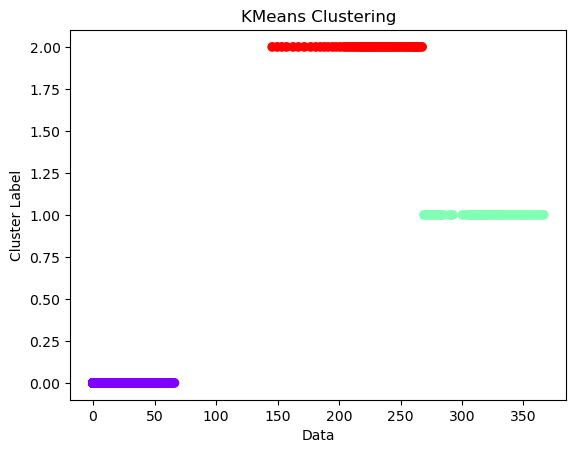

In [84]:
import matplotlib.pyplot as plt

plt.scatter(column_data, kmeans.labels_, c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Data')
plt.ylabel('Cluster Label')
plt.title('KMeans Clustering')
plt.show()


In [43]:
# Set Date as index
Active_Power_df.set_index('Date', inplace=True)

# ARIMA Model

In [41]:
Active_Power_df.head()

,Date,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power
0,2023-03-01 00:00:27+00:00,0.00,0.00,0.00
1,2023-03-01 00:00:50+00:00,0.84,0.84,0.84
2,2023-03-01 00:01:24+00:00,0.00,0.00,0.00
3,2023-03-01 00:01:58+00:00,0.00,0.00,0.00
4,2023-03-01 00:02:31+00:00,0.00,0.00,0.00


### Decomposing Time Series data: Seasonality, Trend and Residual

In [42]:
from pylab import rcParams
import statsmodels.api as sm

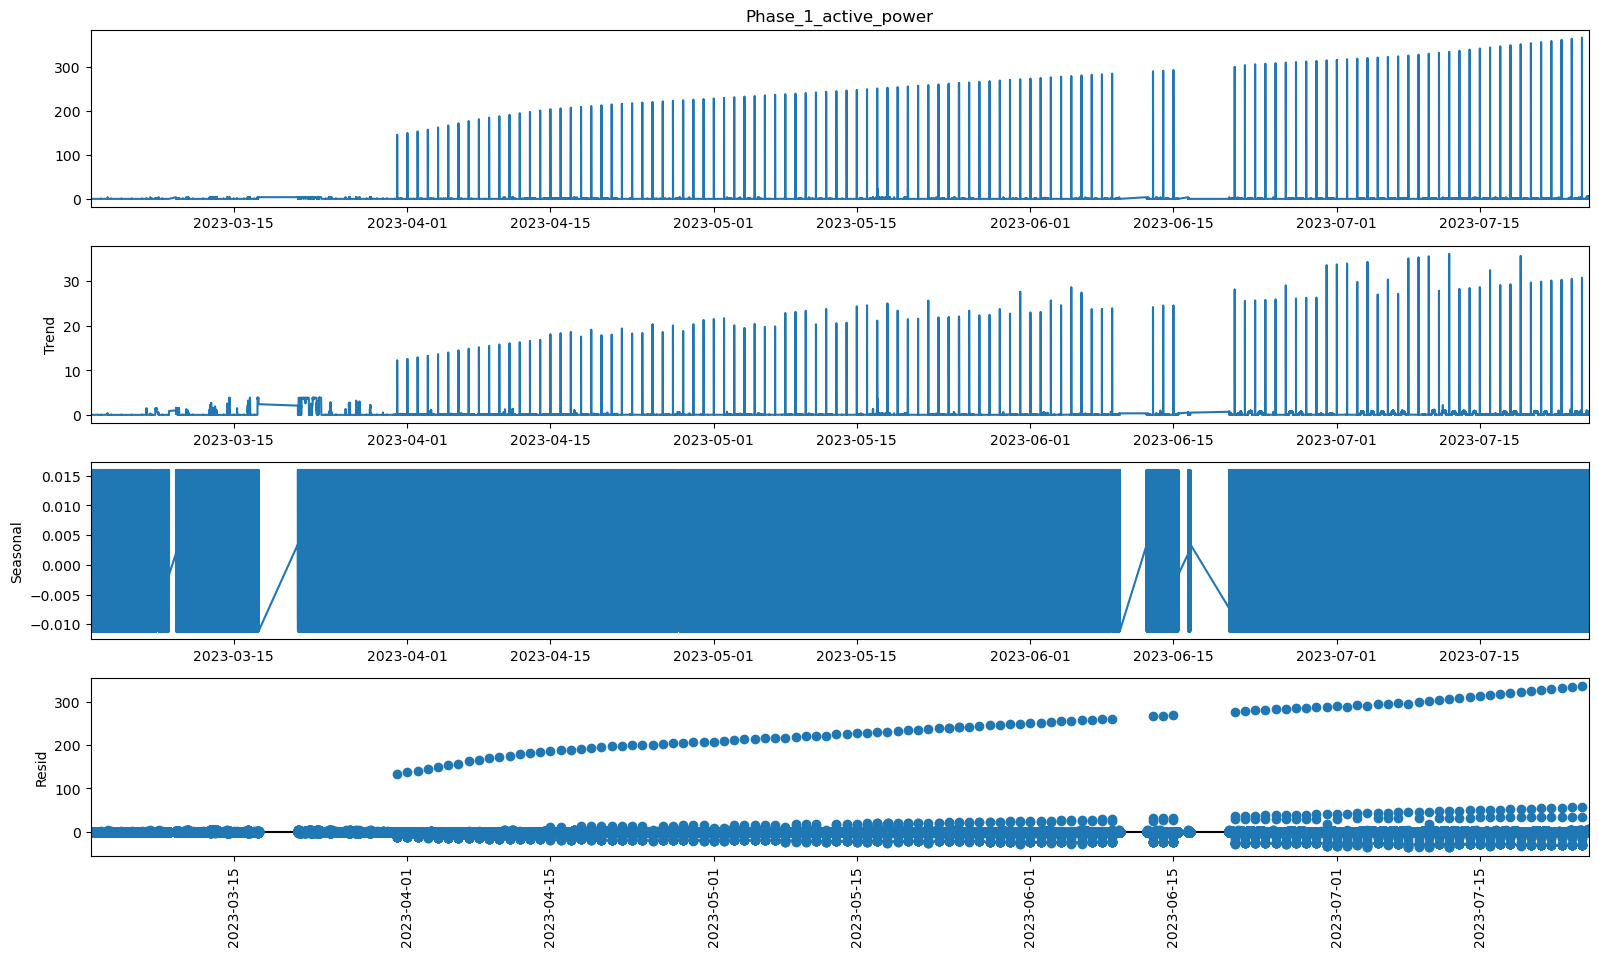

In [43]:
rcParams['figure.figsize'] = 16, 9
decomposed_mains_volume = sm.tsa.seasonal_decompose(Active_Power_df['Phase_1_active_power'],period=12) # The frequncy is annual
figure = decomposed_mains_volume.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

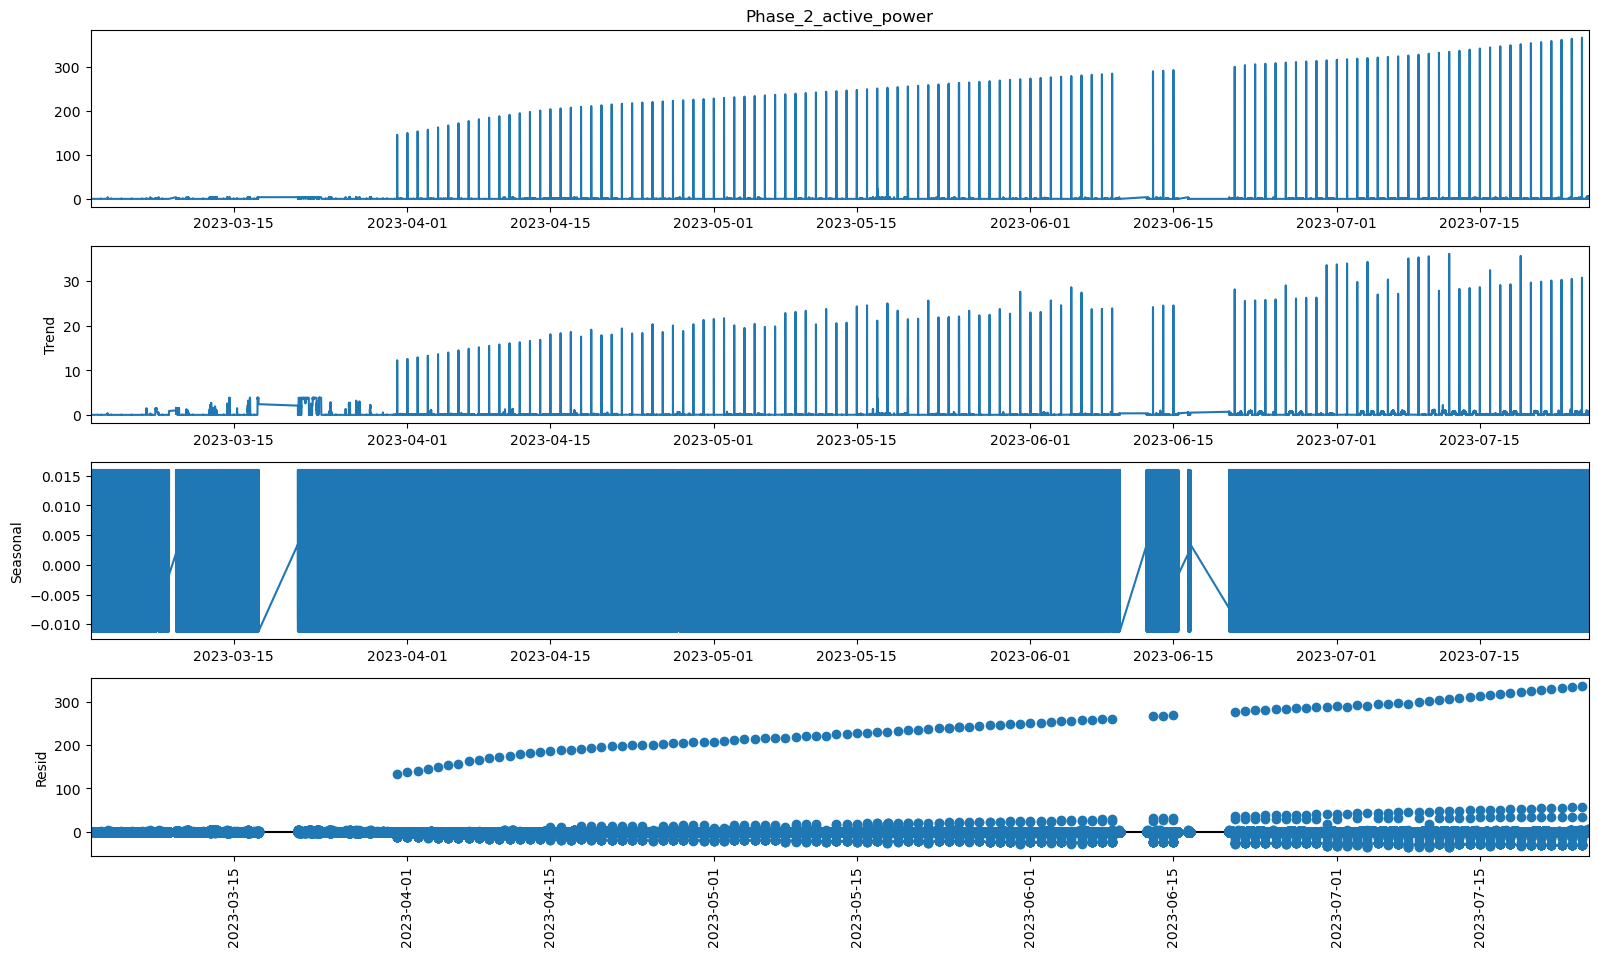

In [44]:
rcParams['figure.figsize'] = 16, 9
decomposed_mains_volume = sm.tsa.seasonal_decompose(Active_Power_df['Phase_2_active_power'],period=12) # The frequncy is annual
figure = decomposed_mains_volume.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

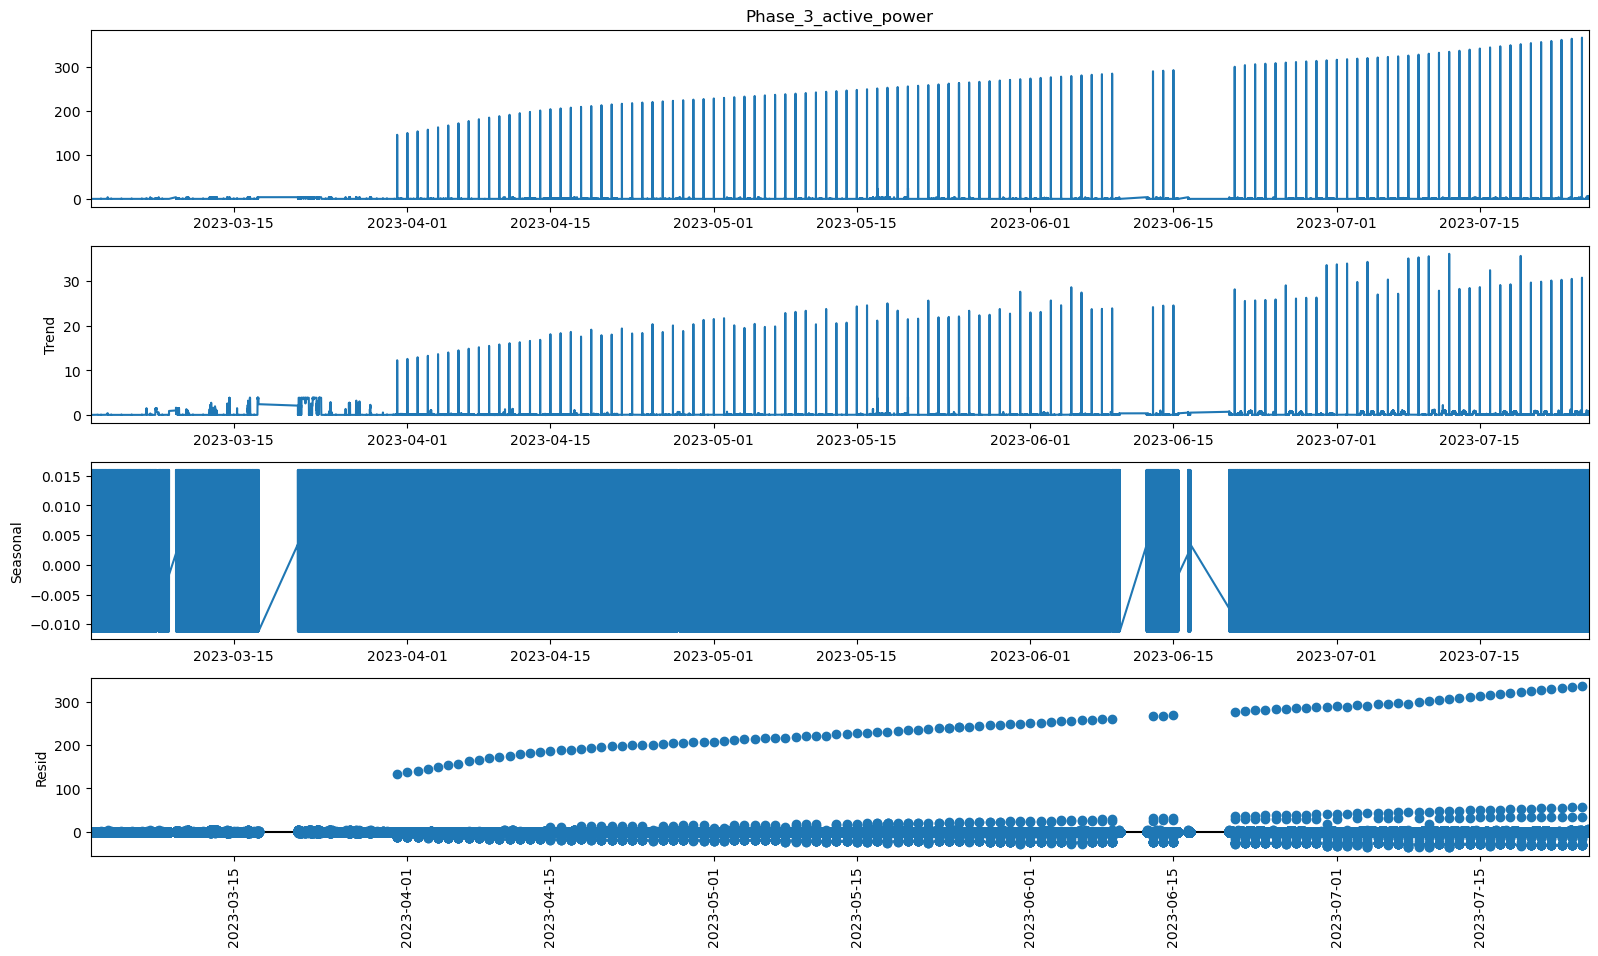

In [45]:
rcParams['figure.figsize'] = 16, 9
decomposed_mains_volume = sm.tsa.seasonal_decompose(Active_Power_df['Phase_3_active_power'],period=12) # The frequncy is annual
figure = decomposed_mains_volume.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

### Stationarity

In [87]:
from statsmodels.tsa.stattools import adfuller


# Perform the Augmented Dickey-Fuller test
result = adfuller(Active_Power_df['Phase_1_active_power'])

# Extract and print the test results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"  {key}: {value}")


MemoryError: Unable to allocate 537. MiB for an array with shape (44, 1600832) and data type float64

### Model

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# ACF Plot
fig, ax = plt.subplots(figsize=(16, 6))
plot_acf(Active_Power_df['Phase_1_active_power'], lags=40, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
plt.show()

In [ ]:
# PACF Plot
fig, ax = plt.subplots(figsize=(16, 6))
plot_pacf(df['Phase 1 to line voltage'], lags=40, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.show()

In [44]:
Active_Power_df.head()

,Phase_1_active_power,Phase_2_active_power,Phase_3_active_power
Date,,,
2023-03-01 00:00:27+00:00,0.00,0.00,0.00
2023-03-01 00:00:50+00:00,0.84,0.84,0.84
2023-03-01 00:01:24+00:00,0.00,0.00,0.00
2023-03-01 00:01:58+00:00,0.00,0.00,0.00
2023-03-01 00:02:31+00:00,0.00,0.00,0.00


In [60]:
Train_subset = Active_Power_df[(Active_Power_df.index >= '2023-03-01 00:00:27+00:00') & (Active_Power_df.index <= '2023-04-15 00:00:27+00:00')]
Test_subset = Active_Power_df[(Active_Power_df.index >= '2023-04-15 01:00:27+00:00') & (Active_Power_df.index <= '2023-04-30 00:00:27+00:00')]

In [56]:
Train_subset = Active_Power_df[(Active_Power_df.index >= '2023-03-01 00:00:27+00:00') & (Active_Power_df.index <= '2023-04-30 00:00:27+00:00')]
Test_subset = Active_Power_df[(Active_Power_df.index >= '2023-05-01 00:00:27+00:00') & (Active_Power_df.index <= '2023-05-16 00:00:27+00:00')]

In [61]:
train_data = Train_subset['Phase_1_active_power']
test_data = Test_subset['Phase_1_active_power']

In [46]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(Active_Power_df, test_size=0.2, shuffle=False)

In [50]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import nsdiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

suppress_warnings=True is used to suppress any warnings that might be generated during the fitting process.

exogenous refers to the exogenous variables. You're passing additional data that might influence the main time series

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               214873
Model:               SARIMAX(4, 0, 3)   Log Likelihood             -401255.115
Date:                Thu, 10 Aug 2023   AIC                         802528.230
Time:                        10:54:24   BIC                         802620.731
Sample:                             0   HQIC                        802555.371
                             - 214873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.002      0.488      0.625      -0.002       0.004
ar.L1         -0.4287      0.480     -0.893      0.372      -1.369       0.512
ar.L2          0.5170      0.346      1.495      0.1

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


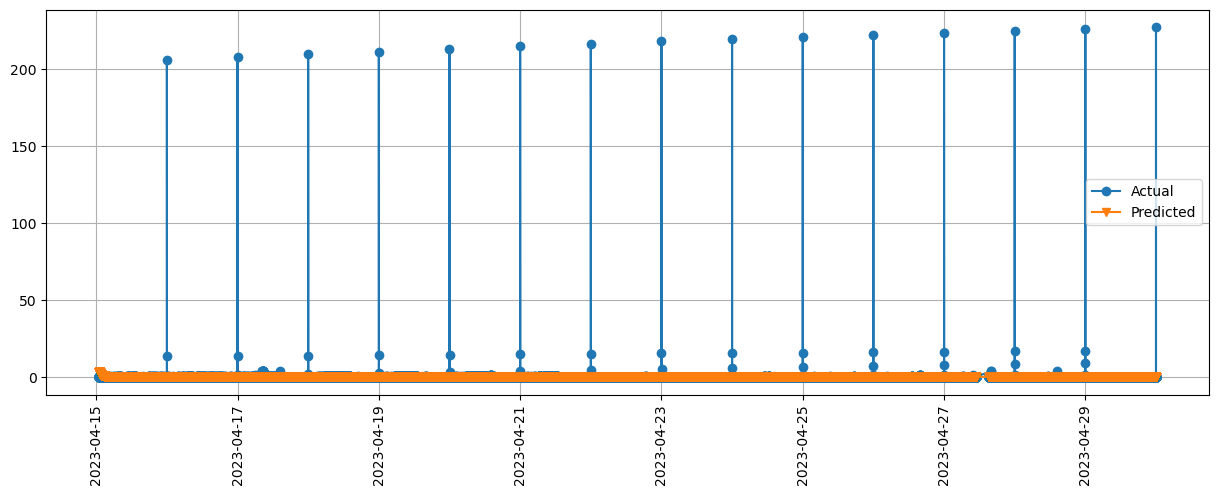

Mean Absolute Percentage Error:  241025659518334.78
Mean Squared Error:  3.461955738820826
Root Mean Squared Error:  1.8606331553589026
AIC:  802528.2303788722
          Test  Prediction  Difference      % Change
0         0.07    3.506757   -3.436757  4.909652e+03
1         0.00    3.493052   -3.493052           inf
2         0.00    3.542016   -3.542016           inf
3         0.06    3.460200   -3.400200  5.667000e+03
4         0.01    3.511960   -3.501960  3.501960e+04
...        ...         ...         ...           ...
206812    0.06    0.125901   -0.065901  1.098350e+02
206813  226.94    0.125901  226.814099  9.994452e+01
206814    0.00    0.125901   -0.125901           inf
206815    0.00    0.125901   -0.125901           inf
206816    0.07    0.125901   -0.055901  7.985854e+01

[206817 rows x 4 columns]


In [65]:
# Assuming 'train_data' and 'test_data' are DataFrames with the 'date' column set as the index.

# Fit the ARIMA model
model = pm.ARIMA(order=(4, 0, 3), suppress_warnings=True)
model.fit(train_data, exogenous=train_data.drop(columns=['Phase_1_active_power']))

# Print out summary information on the fit
print(model.summary())
print(model.params)

# Predict on the test set with exogenous variables
predictions = model.predict(n_periods=len(test_data), X=test_data.drop(columns=['Phase_1_active_power']), alpha=0.05)

# Plot the actual and predicted values
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(test_data.index, test_data, marker='o', label='Actual')
plt.plot(test_data.index, predictions, marker='v', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Model evaluation
mape = mean_absolute_percentage_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = mse ** 0.5
aic = model.aic()

print("="*50)
print("Mean Absolute Percentage Error: ", mape)
print("="*50)
print("Mean Squared Error: ", mse)
print("="*50)
print("Root Mean Squared Error: ", rmse)
print("="*50)
print("AIC: ", aic)
print("="*50)

# Convert test_data and predictions to DataFrames for comparison
a = pd.DataFrame(test_data)
prediction = pd.DataFrame(predictions)

# Reset the index of the DataFrames for comparison
a = a.reset_index(drop=True)
prediction = prediction.reset_index(drop=True)

output = pd.DataFrame()
output['Test'] = a['Phase_1_active_power']
output['Prediction'] = prediction[0]
output['Difference'] = output['Test'] - output['Prediction']
output['% Change'] = abs(output['Difference'] / output['Test']) * 100

print(output)
print (predicted)


In [1]:
print (predicted)

NameError: name 'predicted' is not defined

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               214873
Model:               SARIMAX(2, 0, 2)   Log Likelihood             -401252.779
Date:                Thu, 10 Aug 2023   AIC                         802517.558
Time:                        11:26:54   BIC                         802579.224
Sample:                             0   HQIC                        802535.651
                             - 214873                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.001      0.493      0.622      -0.001       0.002
ar.L1          0.0493      0.034      1.442      0.149      -0.018       0.116
ar.L2          0.9471      0.034     27.749      0.0

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


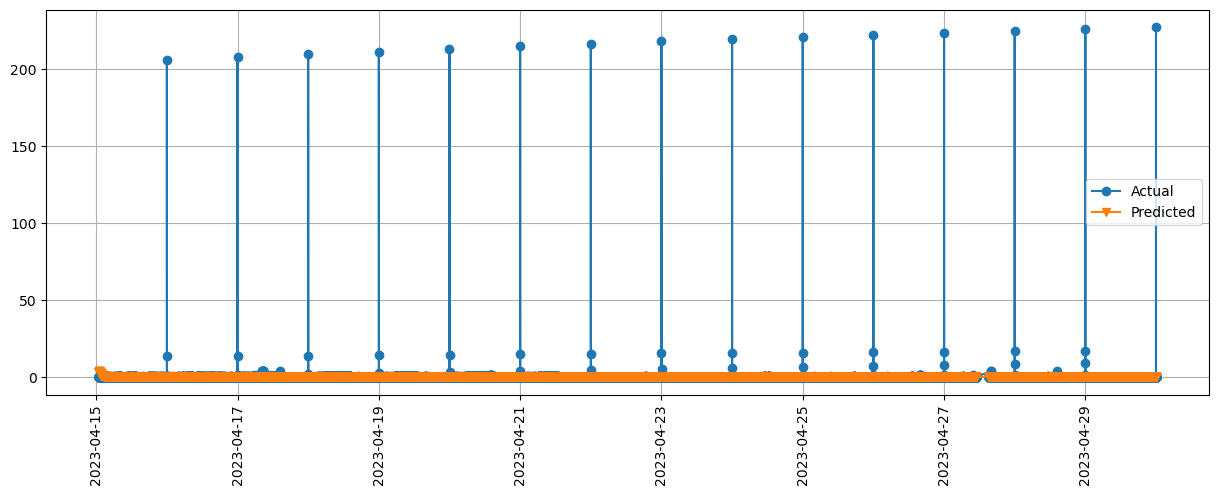

Mean Absolute Percentage Error:  239659963445763.25
Mean Squared Error:  3.4617471254827192
Root Mean Squared Error:  1.860577094743112
AIC:  802517.5575460289
          Test  Prediction  Difference      % Change
0         0.07    3.296750   -3.226750  4.609642e+03
1         0.00    3.727327   -3.727327           inf
2         0.00    3.306596   -3.306596           inf
3         0.06    3.693650   -3.633650  6.056084e+03
4         0.01    3.314261   -3.304261  3.304261e+04
...        ...         ...         ...           ...
206812    0.06    0.125204   -0.065204  1.086734e+02
206813  226.94    0.125204  226.814796  9.994483e+01
206814    0.00    0.125204   -0.125204           inf
206815    0.00    0.125204   -0.125204           inf
206816    0.07    0.125204   -0.055204  7.886291e+01

[206817 rows x 4 columns]


In [67]:
# Assuming 'train_data' and 'test_data' are DataFrames with the 'date' column set as the index.

# Fit the ARIMA model
model = pm.ARIMA(order=(2, 0, 2), suppress_warnings=True)
model.fit(train_data, exogenous=train_data.drop(columns=['Phase_1_active_power']))

# Print out summary information on the fit
print(model.summary())
print(model.params)

# Predict on the test set with exogenous variables
predictions = model.predict(n_periods=len(test_data), X=test_data.drop(columns=['Phase_1_active_power']), alpha=0.05)

# Plot the actual and predicted values
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(test_data.index, test_data, marker='o', label='Actual')
plt.plot(test_data.index, predictions, marker='v', label='Predicted')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Model evaluation
mape = mean_absolute_percentage_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = mse ** 0.5
aic = model.aic()

print("="*50)
print("Mean Absolute Percentage Error: ", mape)
print("="*50)
print("Mean Squared Error: ", mse)
print("="*50)
print("Root Mean Squared Error: ", rmse)
print("="*50)
print("AIC: ", aic)
print("="*50)

# Convert test_data and predictions to DataFrames for comparison
a = pd.DataFrame(test_data)
prediction = pd.DataFrame(predictions)

# Reset the index of the DataFrames for comparison
a = a.reset_index(drop=True)
prediction = prediction.reset_index(drop=True)

output = pd.DataFrame()
output['Test'] = a['Phase_1_active_power']
output['Prediction'] = prediction[0]
output['Difference'] = output['Test'] - output['Prediction']
output['% Change'] = abs(output['Difference'] / output['Test']) * 100

print(output)


In [90]:
import itertools

In [94]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [97]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(Active_Power_df,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAXNonexNone12 model - AIC:inf


In [66]:


from pmdarima.arima import auto_arima


adfuller(train_data.diff().dropna())

def arimamodel(timeseriesarray, exogenous=None):
    autoarima_model = auto_arima(timeseriesarray,
                                 start_p=0, # auto-regressive (AR)
                                 start_q=0, # moving average (MA)
                                 test="adf", # ADF Augmented Dickey-Fuller test.
                                 trace=True,
                                 seasonal=True,
                                 d=None, max_d=4, max_p=4,
                                 exogenous=exogenous
                                 )
    return autoarima_model

q_max = 3 # Maximum value of q for iteration

for i in range(q_max//2):
    q = 2*i+1
    print(f'q={q}')

    # Replace the following lines with your actual time series data from train_data
    X_MA = train_data.astype(float)

    arima_model = arimamodel(X_MA)
    parameter = arima_model.order
    print(f'Optimal order is: {parameter}\n')

q=1
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=822338.341, Time=2.84 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=819963.457, Time=3.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=820343.831, Time=13.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=823451.131, Time=1.44 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=817882.053, Time=5.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=816153.880, Time=16.75 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=814680.908, Time=16.09 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=802526.045, Time=205.86 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=802521.181, Time=162.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=802520.305, Time=111.73 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=802518.479, Time=118.30 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=802520.307, Time=146.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=818748.323, Time=19.34 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=802517.558, T